# Machine Learning Lab 1

## Assignment 2 (Deadline : 22/10/2020 11:59PM)

Total Points : 50

### 1. Read the data into numpy array

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import HTML, display

In [2]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".

dif = pd.read_csv('data.csv', names=['x1', 'x2', 'y'], skiprows=[0])
dif.head()

FileNotFoundError: [Errno 2] File data.csv does not exist: 'data.csv'

### 2. Plot and Explore the data to get a better understanding

In [7]:
dif.describe()

,x1,x2,y
count,3000.000000,3000.00000,3000.000000
mean,-18.483293,31.24422,-11.450140
std,34.398479,42.99015,662.873355
min,-140.710000,-132.18000,-2325.790000
25%,-40.392500,3.38250,-446.140000
50%,-18.485000,31.34500,-17.680000
75%,4.125000,60.59000,429.782500
max,93.930000,189.99000,2198.490000


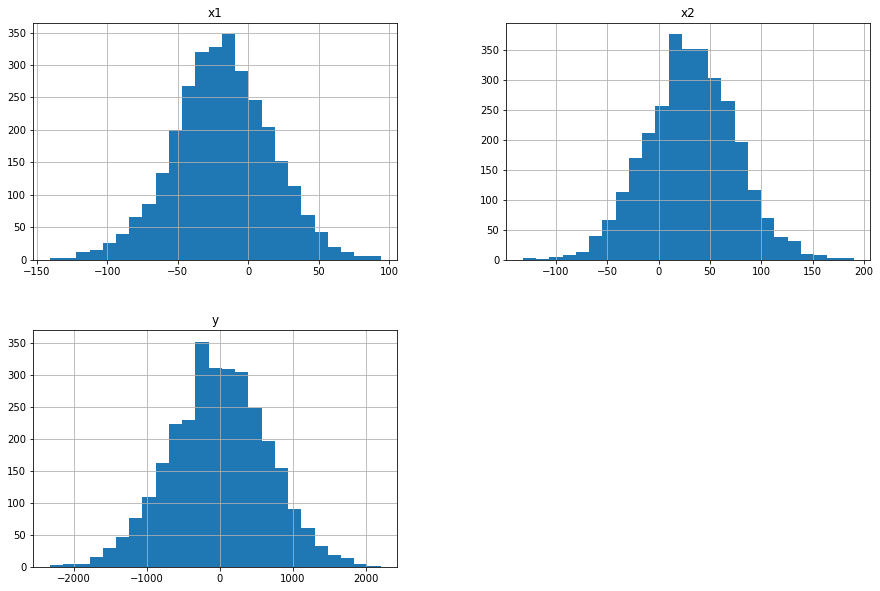

In [4]:
dif.hist(bins=25, figsize=(15,10))
plt.show()

### 3. Prepare the data for modelling. (8 points)

In [8]:
# Separate the data: input and output.

trainP = dif[['x1','x2']]
trianO = dif['y']
trainS = trainP.shape[0]
const = pd.DataFrame(np.ones(trainS))
trainP = pd.concat([const,trainP], axis = 'columns')
dif.corr()['y']


x1    0.890029
x2    0.786392
y     1.000000
Name: y, dtype: float64

In [9]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 
# From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?

X_split, X_test, y_split, y_test = train_test_split(trainP, trianO, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_split, y_split, test_size=0.25, random_state=42)

# stratified sampling is not necessary, correlation shows not much diference in variables,  both the features are closely related to the output.

### 4. Modelling

#### 4.1. Linear Regression (8 points)

In [10]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.

lnr = LinearRegression().fit(X_split, y_split)
train_predict = lnr.predict(X_split)
test_predict = lnr.predict(X_test)
train_score = lnr.score(X_split, y_split)
test_score = lnr.score(X_test, y_test)
print('test_score', test_score)



test_score 0.951393653409172


#### 4.2. Ridge Regression (8 points)

In [11]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

alphas = np.linspace(0.001, 500, 1000)
ridge = RidgeCV(alphas=alphas).fit(X_split, y_split)
train_score = ridge.score(X_val, y_val)
train_ridge_predict = ridge.predict(X_split)
test_ridge_predict = ridge.predict(X_test)
print('ridge.alpha_', ridge.alpha_)
print('ridge.coef_', ridge.coef_)

ridge.alpha_ 344.84515515515517
ridge.coef_ [ 0.         12.72506742  7.08385894]


#### 4.3. Lasso Regression (8 points)

In [ ]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

alphas = np.linspace(0.001, 1000,10000)
lasso = LassoCV(alphas=alphas).fit(X_split, np.array(y_split))
train_score = ridge.score(X_split, y_split)
train_lasso_predict = lasso.predict(X_split)
test_lasso_predict = lasso.predict(X_test)
print('lasso.alpha_', lasso.alpha_)
print('lasso.coef_', lasso.coef_)

#### 4.4. ElasticNet Regression (8 points)

In [1]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

alphas = np.linspace(0.001, 100,1000)
ll_ratios = np.linspace(0.01, 1,10)
cv_model = ElasticNetCV(ll_ratio=ll_ratios, alphas=alphas)
cv_model.fit(X_split, y_split)
train_elasticNetCV_predict = cv_model.predict(X_split)
test_elasticNetCV_predict = cv_model.predict(X_test)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal ll_ratio: %.3f'%cv_model.ll_ratio_)
print('No. of iterations %d'%cv_model.n_iter_)

NameError: name 'np' is not defined

### 5. Analysis (8 points)

In [ ]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.

analysis = pd.DataFrame()
analysis['Test Output'] = y_test
analysis['LinearRegression Output'] = test_predict
analysis['Ridge Output'] = test_ridge_predict
analysis['Lasso Output'] = test_lasso_predict
analysis['Elasticnet Output'] = test_elasticNetCV_predict
analysis.head(10)

In [ ]:
print("---------------------------------------------------------------------------------")
print('RMSE for Linear Regression for Train and Valid data: ',np.sqrt(mean_squared_error(y_split, train_predict)))
print('RMSE for Linear Regression for Test data: ',np.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE for Linear Regression for Train+Valid data: ',mean_absolute_error(y_split,train_predict))
print('MAE for Linear Regression for Test data: ',mean_absolute_error(y_test,test_predict))
print("---------------------------------------------------------------------------------")
print('RMSE for Ridge Regression for Train and Valid data: ',np.sqrt(mean_squared_error(y_split, train_ridge_predict)))
print('RMSE for Ridge Regression for Test data: ',np.sqrt(mean_squared_error(y_test, test_lasso_predict)))
print('MAE for Ridge Regression for Train+Valid data: ',mean_absolute_error(y_split, train_ridge_predict))
print('MAE for Ridge Regression for Test data: ',mean_absolute_error(y_test, test_lasso_predict))
print("---------------------------------------------------------------------------------")
print('RMSE for Ridge Regression for Train and Valid data: ',np.sqrt(mean_squared_error(y_split, train_lasso_predict)))
print('RMSE for Ridge Regression for Test data: ',np.sqrt(mean_squared_error(y_test, test_lasso_predict)))
print('MAE for Ridge Regression for Train+Valid data: ',mean_absolute_error(y_split, train_lasso_predict))
print('MAE for Ridge Regression for Test data: ',mean_absolute_error(y_test, test_lasso_predict))
print("---------------------------------------------------------------------------------")
print('RMSE for ElasticNet Regression for Train and Valid data: ',np.sqrt(mean_squared_error(y_split, train_elasticNetCV_predict)))
print('RMSE for ElasticNet Regression for Test data: ',np.sqrt(mean_squared_error(y_test, test_elasticNetCV_predict)))
print('MAE for ElasticNet Regression for Train+Valid data: ',mean_absolute_error(y_split, train_elasticNetCV_predict))
print('MAE for ElasticNet Regression for Test data: ',mean_absolute_error(y_test, test_elasticNetCV_predict))
print("---------------------------------------------------------------------------------")

### 6. Final Observations (2 points)

In [4]:
# Write down your final conclusions/observations.

# The regularization does not have much effect on the model, as the RMSE and MAE errors above are almost similar for the 4 models
# The coeffients of x1 and x2 obtained from the 4 models also come out to be close. Linear regression would be best suited in 
# this case as less processing is required without any regularization.